In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df = pd.read_csv('star_classification.csv')
display(df.head())
df.info()

print("Statistical Summary:")
print(df.describe())

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [1]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Class Distrubution of Celestial Objects')
plt.show

NameError: name 'plt' is not defined

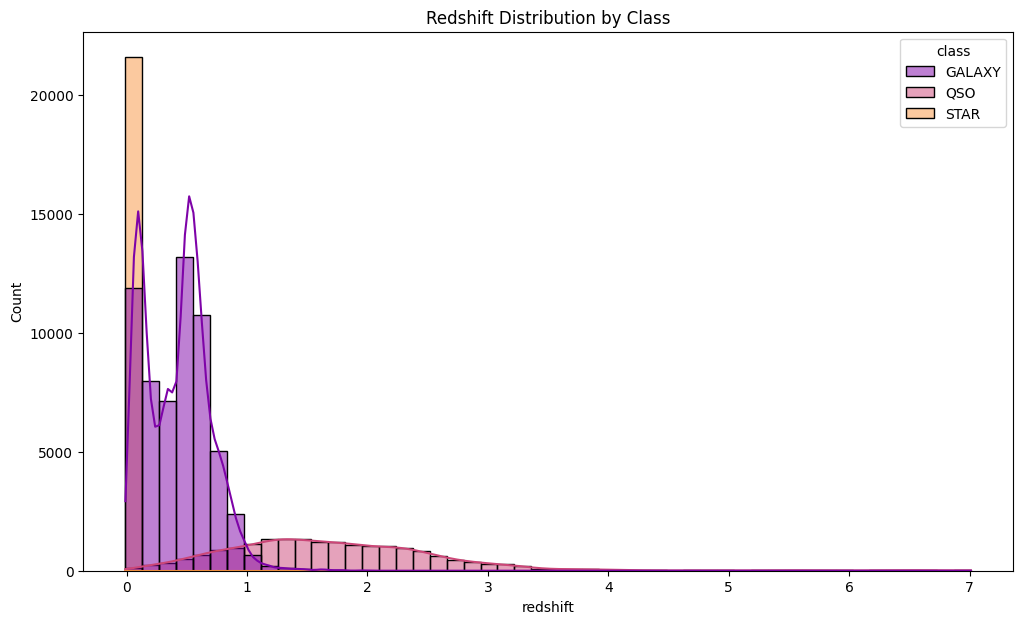

In [ ]:
#Look at Redshift: Redshift is a key indicator of distance and is crucial for distinguishing between stars and galaxies/quasars.
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='redshift', hue='class', kde=True, bins = 50, palette='plasma')
plt.title('Redshift Distribution by Class') 
plt.show()

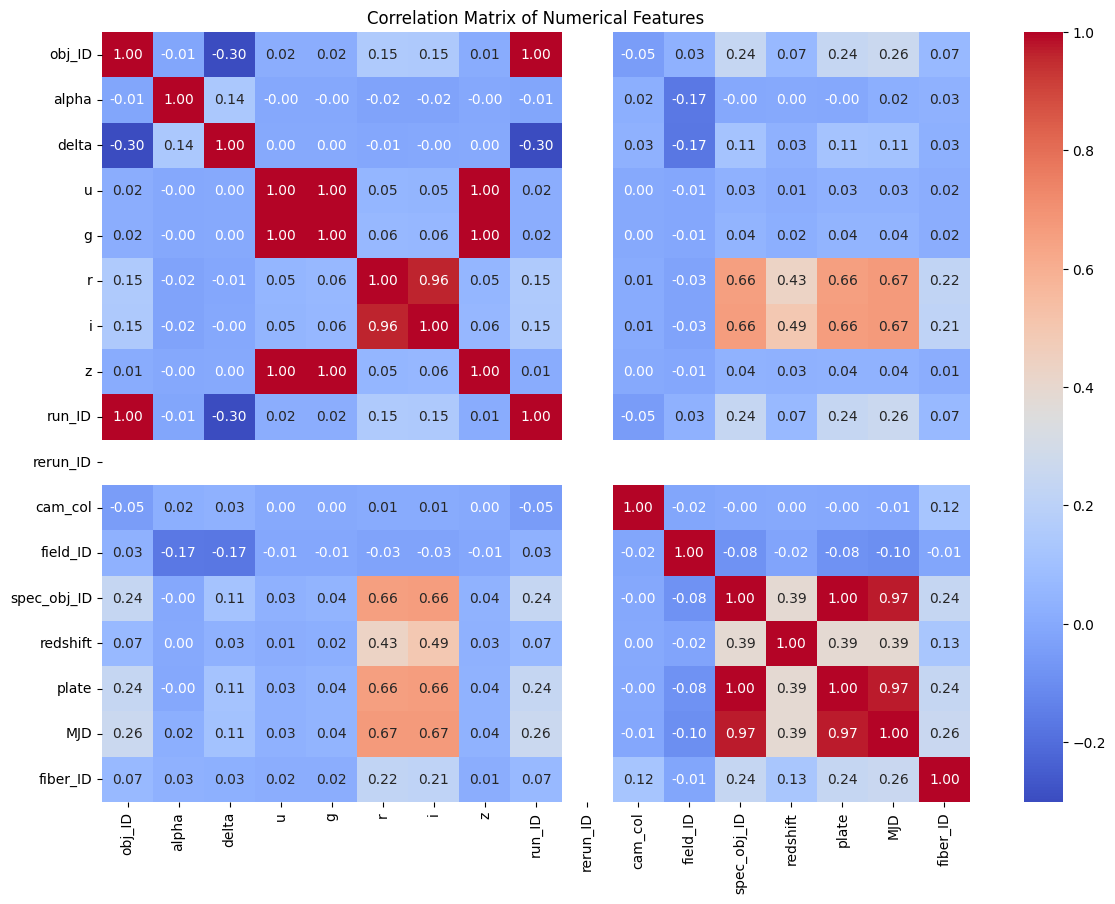

In [5]:
#Analyze the Photometric Bands (u, g, r, i, z): These represent the brightness of the object through different color filters. The difference between them (the "colors") can tell us about the object's temperature and type.

numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [7]:
#dropping identifier columns - not needed in our prediction model

df_cleaned = df.drop(columns=['obj_ID', 'rerun_ID'])

X = df_cleaned.drop(columns='class', axis=1)
y = df_cleaned['class']
print("Separated features (X) and target (y).")




Separated features (X) and target (y).


In [8]:
#scaling numeral features to improve performance

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled numerical features.")

Scaled numerical features.


In [9]:
#splitting data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training and testing sets. Training size: {len(X_train)}, Testing size: {len(X_test)}")

Data split into training and testing sets. Training size: 80000, Testing size: 20000


Training Random Forest Classifier...
Model training complete.
Predictions on test set.
Baseline Model Accuracy: 0.9786
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.93      0.95      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000

Confusion Matrix:


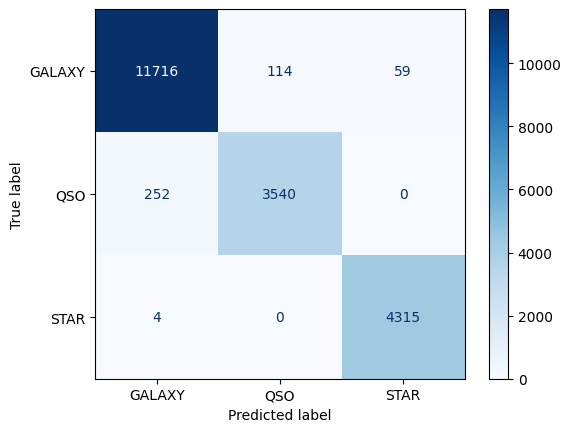

In [11]:
#Baseline model - random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

print("Training Random Forest Classifier...")

baseline_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
baseline_model.fit(X_train, y_train)
print("Model training complete.")

y_pred_baseline = baseline_model.predict(X_test)
print("Predictions on test set.")

accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_baseline))

print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_baseline, cmap='Blues')
plt.show()

In [1]:
#building and training neural network model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

ModuleNotFoundError: No module named 'tensorflow.keras'

In [1]:
!pip list


Package                      Version
---------------------------- --------------
absl-py                      2.3.1
anyio                        4.10.0
argon2-cffi                  25.1.0
argon2-cffi-bindings         25.1.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.5
attrs                        25.3.0
babel                        2.17.0
beautifulsoup4               4.13.5
bleach                       6.2.0
certifi                      2025.8.3
cffi                         1.17.1
charset-normalizer           3.4.3
colorama                     0.4.6
comm                         0.2.3
contourpy                    1.3.3
cycler                       0.12.1
debugpy                      1.8.16
decorator                    5.2.1
defusedxml                   0.7.1
executing                    2.2.1
fastjsonschema               2.21.2
flatbuffers                  25.2.10
fonttools                    


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
